<ipython-input-3-8dbeb1960974>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='emotion', data=emotion_counts_df.sort_values(by='count', ascending=False), palette='viridis')


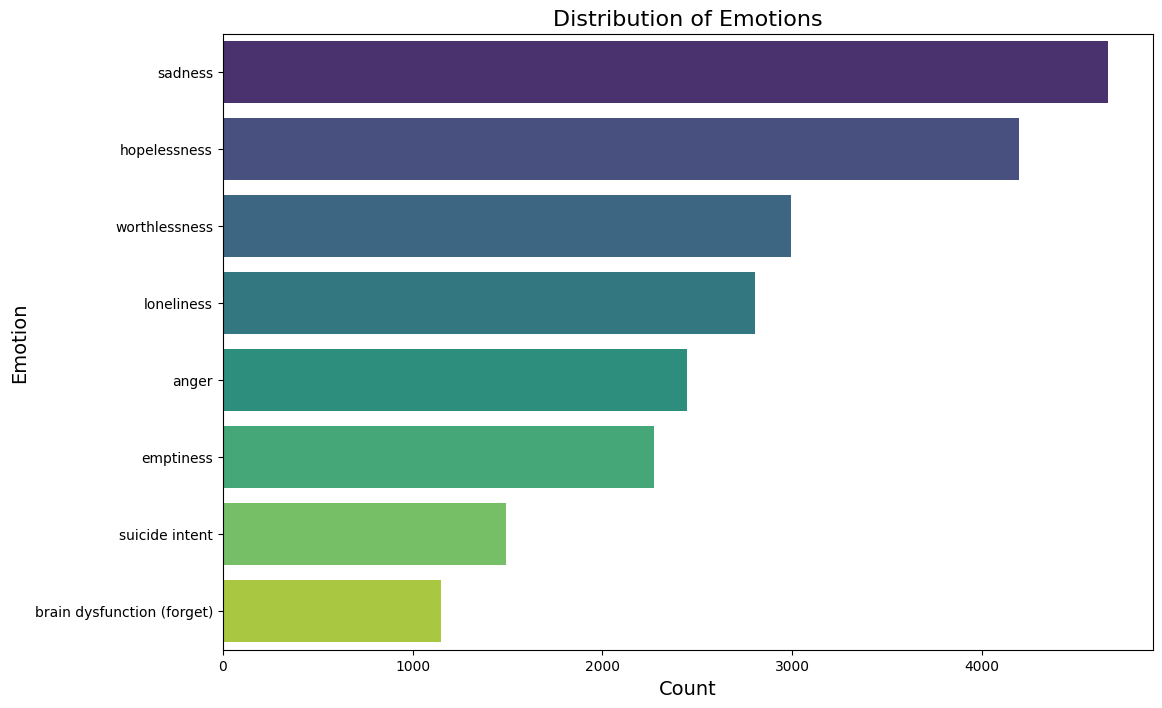

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load your dataset
data_cleaned = pd.read_json('/content/drive/MyDrive/DepressionEmo/Dataset/combined.json', lines=True)

# Flatten the list of emotions
all_emotions = [emotion for sublist in data_cleaned['emotions'] for emotion in sublist]

# Count the frequency of each emotion
emotion_counts = Counter(all_emotions)

# Convert to DataFrame
emotion_counts_df = pd.DataFrame(emotion_counts.items(), columns=['emotion', 'count'])

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='emotion', data=emotion_counts_df.sort_values(by='count', ascending=False), palette='viridis')
plt.title('Distribution of Emotions', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Emotion', fontsize=14)
plt.show()


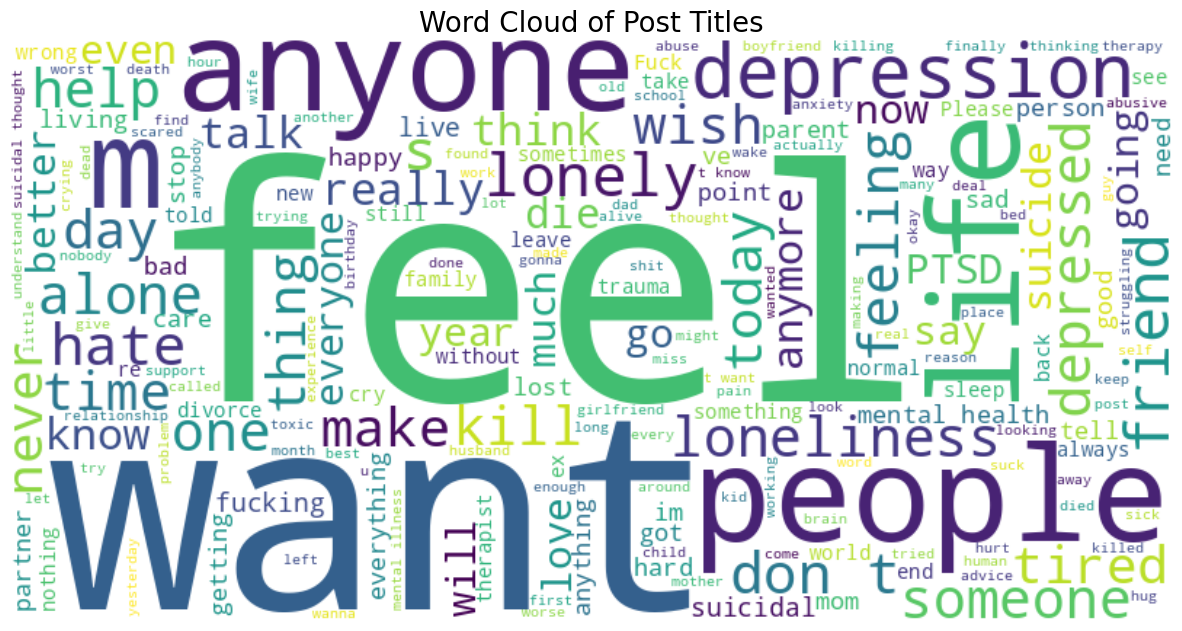

In [ ]:
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(' '.join(data_cleaned['title']))

# Plot the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Post Titles', fontsize=20)
plt.show()


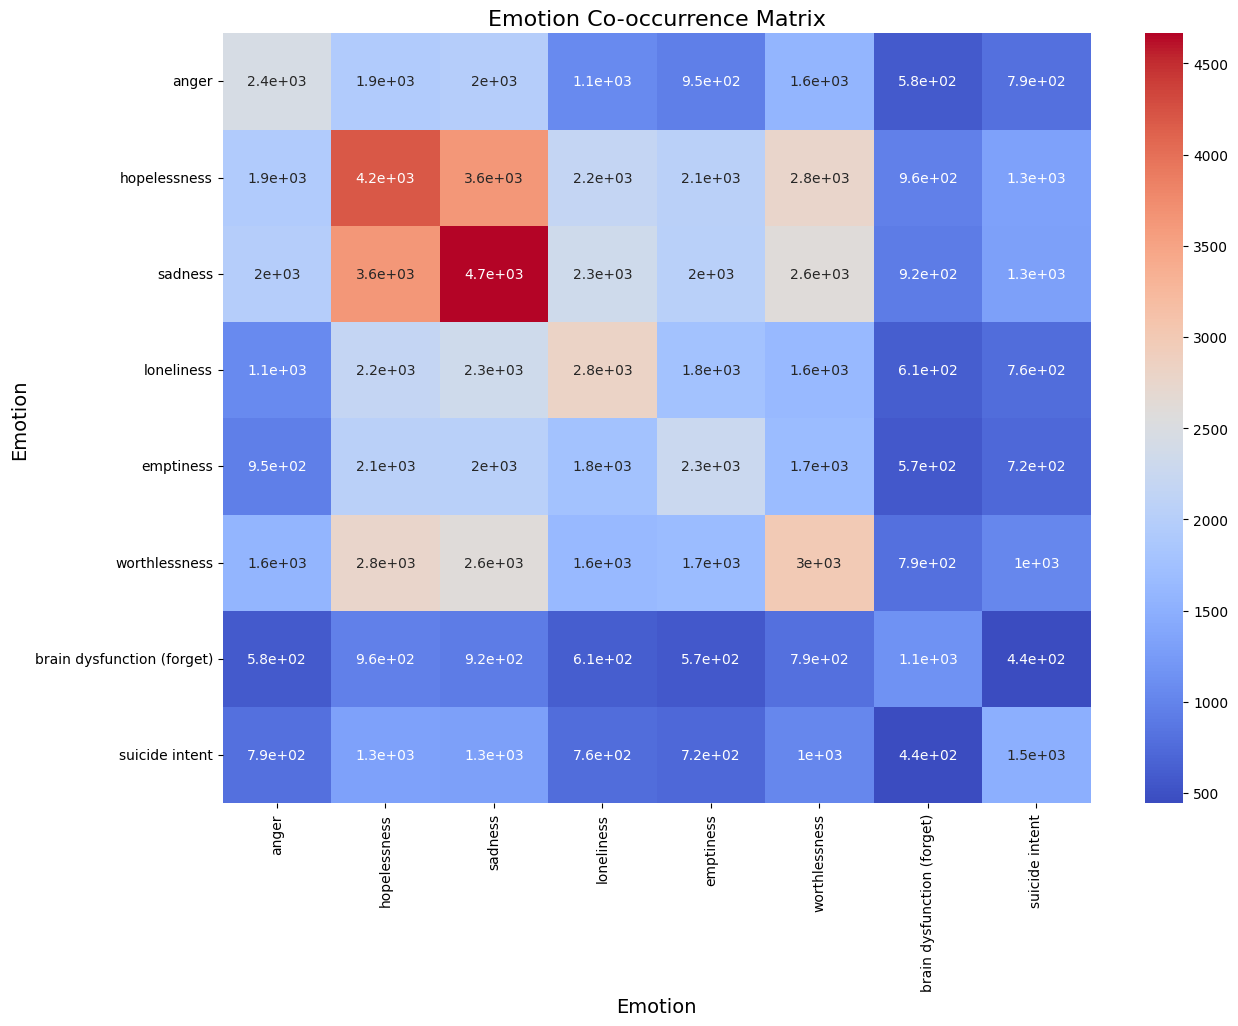

In [ ]:
import numpy as np

# Create a matrix for co-occurrence
emotion_list = list(emotion_counts.keys())
emotion_matrix = np.zeros((len(emotion_list), len(emotion_list)))

# Populate the co-occurrence matrix
emotion_index = {emotion: i for i, emotion in enumerate(emotion_list)}
for emotions in data_cleaned['emotions']:
    for i in range(len(emotions)):
        for j in range(i, len(emotions)):
            emotion_matrix[emotion_index[emotions[i]], emotion_index[emotions[j]]] += 1
            if i != j:
                emotion_matrix[emotion_index[emotions[j]], emotion_index[emotions[i]]] += 1

# Convert to DataFrame
emotion_cooccurrence_df = pd.DataFrame(emotion_matrix, index=emotion_list, columns=emotion_list)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(emotion_cooccurrence_df, annot=True, cmap='coolwarm')
plt.title('Emotion Co-occurrence Matrix', fontsize=16)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Emotion', fontsize=14)
plt.show()


<ipython-input-6-f771d0de7b54>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


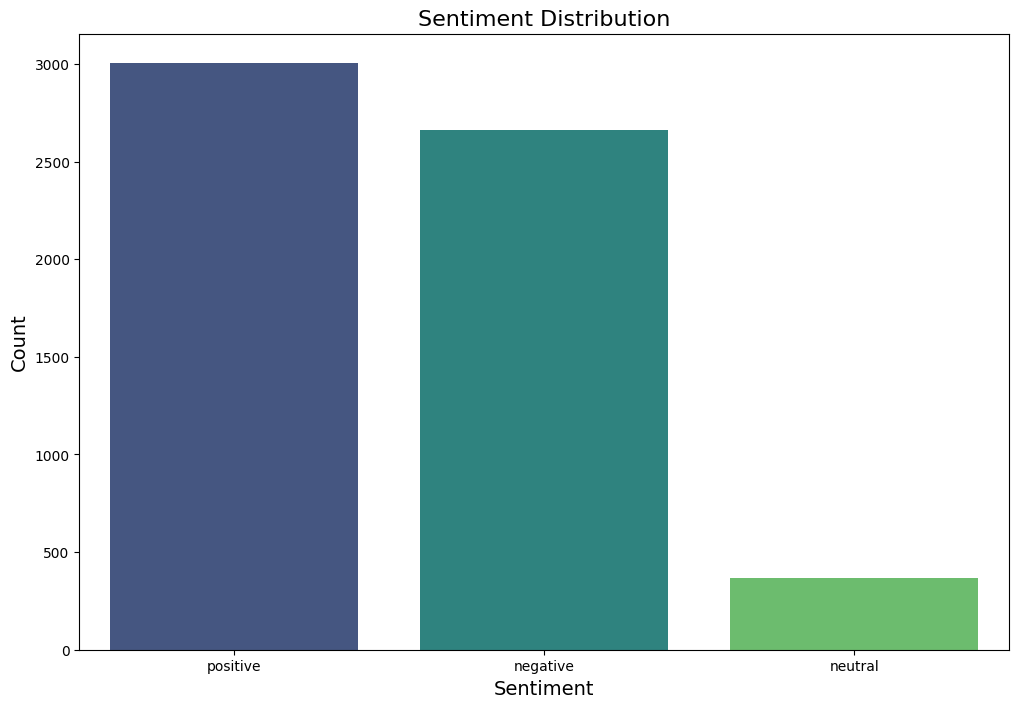

In [ ]:
from textblob import TextBlob

# Function to classify the polarity
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to get sentiment
data_cleaned['sentiment'] = data_cleaned['post'].apply(get_sentiment)

# Plot the sentiment distribution
sentiment_counts = data_cleaned['sentiment'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


<ipython-input-7-05a63e44d327>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotions_count', y='post_length', data=data_cleaned, palette='viridis')


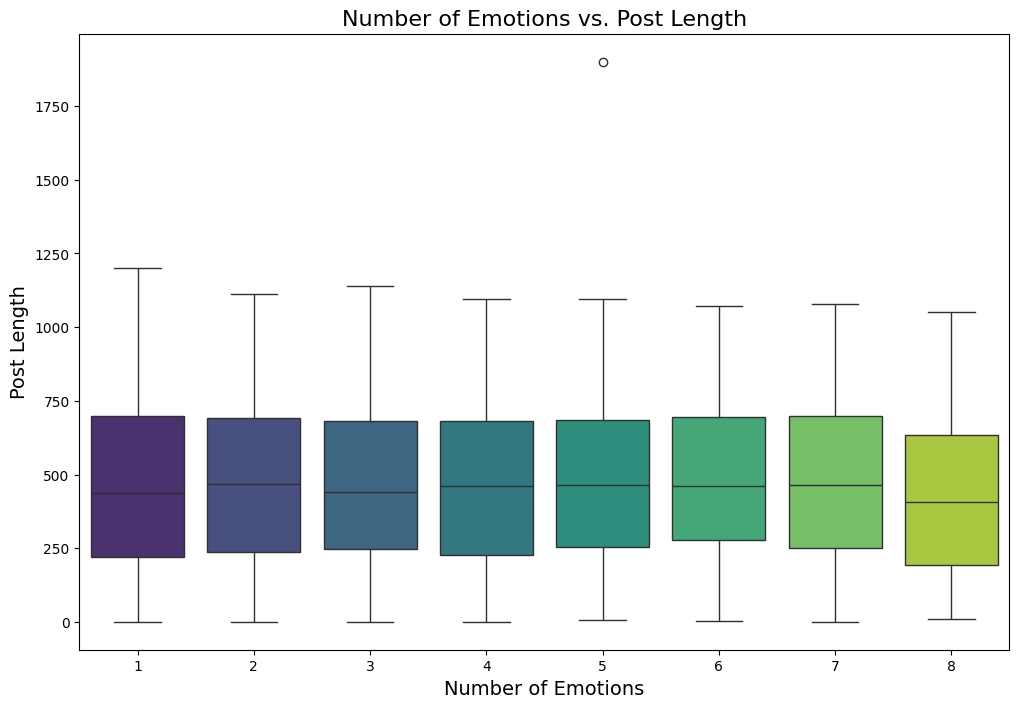

In [ ]:
# Calculate post length
data_cleaned['post_length'] = data_cleaned['post'].apply(len)
data_cleaned['emotions_count'] = data_cleaned['emotions'].apply(len)

# Plot the box plot of emotions_count vs post_length
plt.figure(figsize=(12, 8))
sns.boxplot(x='emotions_count', y='post_length', data=data_cleaned, palette='viridis')
plt.title('Number of Emotions vs. Post Length', fontsize=16)
plt.xlabel('Number of Emotions', fontsize=14)
plt.ylabel('Post Length', fontsize=14)
plt.show()


In [ ]:
import nltk
from nltk.corpus import wordnet
import random

nltk.download('wordnet')
nltk.download('omw-1.4')

def synonym_replacement(text, n):
    words = text.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = wordnet.synsets(random_word)
        if len(synonyms) >= 1:
            synonym = synonyms[0].lemmas()[0].name()
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    return ' '.join(new_words)

# Example Usage
original_text = data_cleaned['post'].iloc[0]
augmented_text = synonym_replacement(original_text, 5)
print(f"Original: {original_text}")
print(f"Augmented: {augmented_text}")


Original: My mum had a boyfriend when I was around 6 or 7. She met him while she was volunteering at a prison. He was incarcerated for 15 years following a spate of armed robberies. 

When he was released she promptly moved him in with us. I found out that the only reason he was released is because she told the parole board that he could move in with us. 

What kind of a parent does that? A few years later after we escaped from him, he ended up shooting a guy 4 time’s in the kneecaps in a McDonald’s parking lot and was sentenced to another decade or so in prison. Guns aren’t easy to come by in Australia.
Augmented: My mum had a boyfriend when I was around 6 or 7. She met him while she was volunteering at a prison. He was imprison for 15 years following a spate of armed robberies. When helium was released she promptly moved him inch with us. I found out that the only reason helium was released is because she told the parole board that helium could move inch with us. What kind of a paren

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
pip install googletrans

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15717 sha256=f298f99829ecbc9351410db32150e4dd20c15c7d171f7090644c085075ce2d4b
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
   

In [ ]:
def noise_injection(text, noise_level=0.1):
    words = text.split()
    n = max(1, int(noise_level * len(words)))
    indices = random.sample(range(len(words)), n)
    for index in indices:
        words[index] = ''.join(random.sample(words[index], len(words[index])))
    return ' '.join(words)

# Example Usage
original_text = data_cleaned['post'].iloc[0]
augmented_text = noise_injection(original_text, 0.1)
print(f"Original: {original_text}")
print(f"Augmented: {augmented_text}")


Original: My mum had a boyfriend when I was around 6 or 7. She met him while she was volunteering at a prison. He was incarcerated for 15 years following a spate of armed robberies. 

When he was released she promptly moved him in with us. I found out that the only reason he was released is because she told the parole board that he could move in with us. 

What kind of a parent does that? A few years later after we escaped from him, he ended up shooting a guy 4 time’s in the kneecaps in a McDonald’s parking lot and was sentenced to another decade or so in prison. Guns aren’t easy to come by in Australia.
Augmented: My umm had a boyfriend when I was around 6 ro 7. She mte him while she was volunteering at a prison. He was incarcerated for 15 years following a spate of armed robberies. When he was released she promptly moved him in with us. I nudfo out that the only reason he was released is because she told the parole board that he could move in with us. What kind of a parent does that?

In [ ]:
from google.colab import userdata
userdata.get('HF_TOKEN')

In [ ]:
from transformers import AutoTokenizer
import torch
import pandas as pd
import json
from torch.utils.data import DataLoader, Dataset

# Define the emotion list
emotion_list = ['anger', 'brain dysfunction (forget)', 'emptiness', 'hopelessness', 'loneliness', 'sadness', 'suicide intent', 'worthlessness']

# Custom function to convert emotions to label_id
def generate_label_id(emotions):
    label_binary = ''.join(['1' if emotion in emotions else '0' for emotion in emotion_list])
    label_id = int(label_binary, 2)
    return label_id

# Load datasets (assuming JSON lines format as given earlier)
def load_json_lines(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data

# Load datasets
train_data = load_json_lines('/content/drive/MyDrive/DepressionEmo/Dataset/train.json')
val_data = load_json_lines('/content/drive/MyDrive/DepressionEmo/Dataset/val.json')
test_data = load_json_lines('/content/drive/MyDrive/DepressionEmo/Dataset/test.json')

# Convert to DataFrame for easier manipulation
train_df = pd.DataFrame(train_data)
val_df = pd.DataFrame(val_data)
test_df = pd.DataFrame(test_data)

# Add label_id to DataFrame
train_df['label_id'] = train_df['emotions'].apply(generate_label_id)
val_df['label_id'] = val_df['emotions'].apply(generate_label_id)
test_df['label_id'] = test_df['emotions'].apply(generate_label_id)

class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            text,
            max_length=self.max_len,
            add_special_tokens=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
max_len = 128

train_dataset = CustomDataset(
    texts=train_df['post'].tolist(),
    labels=train_df['label_id'].tolist(),
    tokenizer=tokenizer,
    max_len=max_len
)

val_dataset = CustomDataset(
    texts=val_df['post'].tolist(),
    labels=val_df['label_id'].tolist(),
    tokenizer=tokenizer,
    max_len=max_len
)

test_dataset = CustomDataset(
    texts=test_df['post'].tolist(),
    labels=test_df['label_id'].tolist(),
    tokenizer=tokenizer,
    max_len=max_len
)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
from transformers import AutoModel, AutoConfig

class ContrastiveModel(torch.nn.Module):
    def __init__(self, model_name, num_classes):
        super(ContrastiveModel, self).__init__()
        self.encoder = AutoModel.from_pretrained(model_name)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(self.encoder.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs[1]
        pooled_output = self.dropout(pooled_output)
        return self.classifier(pooled_output)

model = ContrastiveModel('bert-base-uncased', num_classes=256)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
from transformers import AdamW
from torch.nn import CrossEntropyLoss
from sklearn.metrics import precision_recall_fscore_support

def train(model, data_loader, loss_fn, optimizer, device):
    model.train()
    total_loss = 0

    for batch in data_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(data_loader)

def evaluate(model, data_loader, loss_fn, device):
    model.eval()
    preds, true_labels = [], []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, preds, average='macro')
    return f1, precision, recall

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
loss_fn = CrossEntropyLoss()

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

epochs = 50
for epoch in range(epochs):
    train_loss = train(model, train_loader, loss_fn, optimizer, device)
    val_f1, val_precision, val_recall = evaluate(model, val_loader, loss_fn, device)
    print(f'Epoch {epoch + 1}, Train Loss: {train_loss}, Val F1: {val_f1}, Val Precision: {val_precision}, Val Recall: {val_recall}')


In [ ]:
def evaluate_by_emotion(model, data_loader, device):
    model.eval()
    preds, true_labels = [], []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    results = {}
    for i, emotion in enumerate(emotion_list):
        true_emotion_labels = [(label >> i) & 1 for label in true_labels]
        pred_emotion_labels = [(pred >> i) & 1 for pred in preds]
        precision, recall, f1, _ = precision_recall_fscore_support(true_emotion_labels, pred_emotion_labels, average='binary')
        results[emotion] = {'F1': f1, 'Precision': precision, 'Recall': recall}

    return results

test_f1, test_precision, test_recall = evaluate(model, test_loader, loss_fn, device)
print(f'Test F1: {test_f1}, Test Precision: {test_precision}, Test Recall: {test_recall}')

emotion_results = evaluate_by_emotion(model, test_loader, device)
for emotion, metrics in emotion_results.items():
    print(f'{emotion}: F1={metrics["F1"]}, Precision={metrics["Precision"]}, Recall={metrics["Recall"]}')


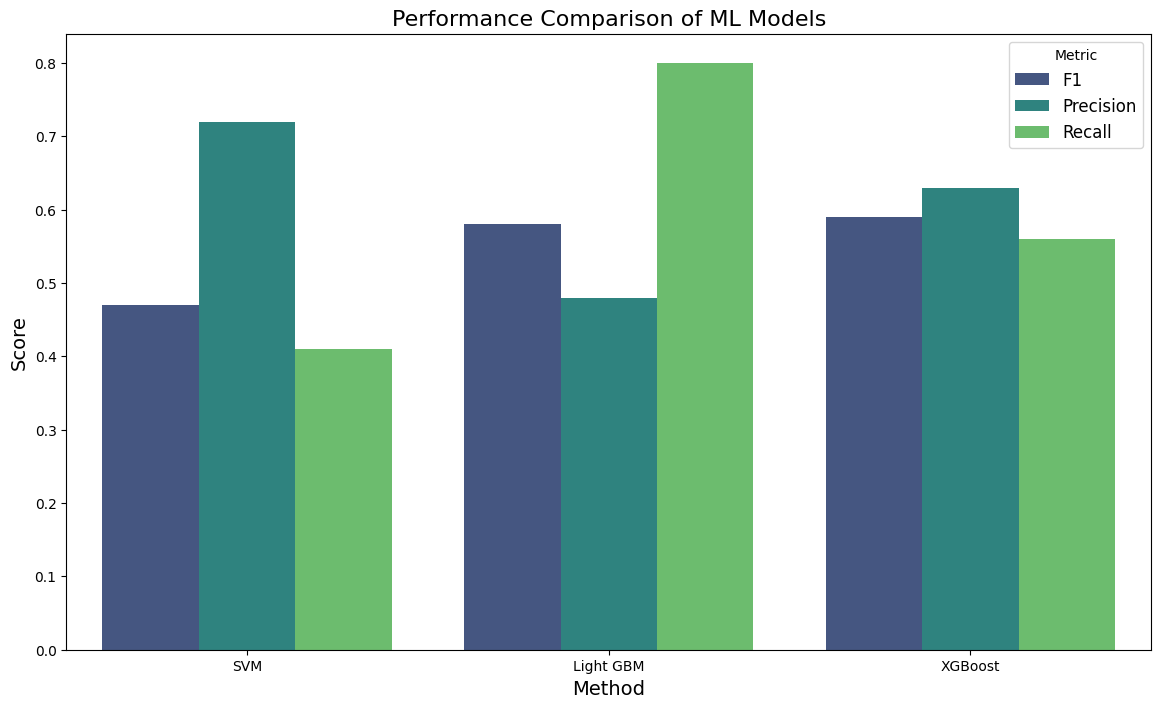

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for ML models
model_data = {
    'Method': ['SVM', 'Light GBM', 'XGBoost'],
    'F1': [0.47, 0.58, 0.59],
    'Precision': [0.72, 0.48, 0.63],
    'Recall': [0.41, 0.80, 0.56]
}

df_models = pd.DataFrame(model_data)

# Melt the dataframe to long format for seaborn
df_melted = df_models.melt(id_vars='Method', var_name='Metric', value_name='Score')

# Plot performance comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='Method', y='Score', hue='Metric', data=df_melted, palette='viridis')
plt.title('Performance Comparison of ML Models', fontsize=16)
plt.xlabel('Method', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(title='Metric', fontsize=12)
plt.show()


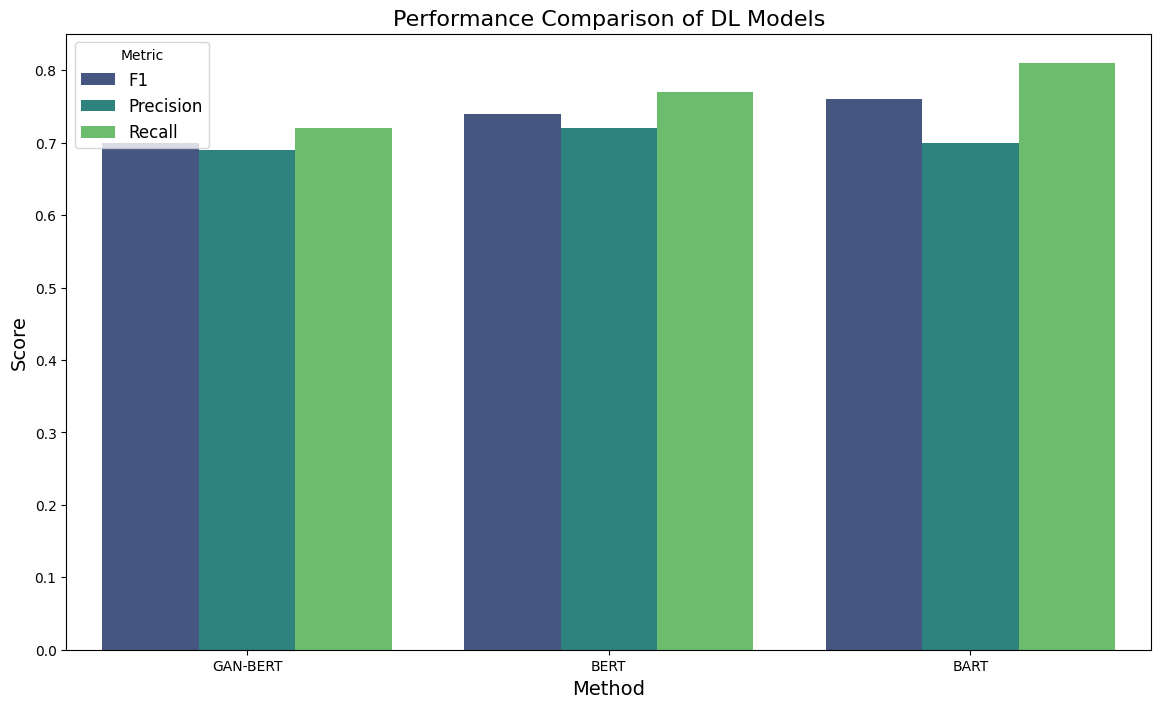

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for DL models
dl_model_data = {
    'Method': ['GAN-BERT', 'BERT', 'BART'],
    'F1': [0.70, 0.74, 0.76],
    'Precision': [0.69, 0.72, 0.70],
    'Recall': [0.72, 0.77, 0.81]
}

df_dl_models = pd.DataFrame(dl_model_data)

# Melt the dataframe to long format for seaborn
df_dl_melted = df_dl_models.melt(id_vars='Method', var_name='Metric', value_name='Score')

# Plot performance comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='Method', y='Score', hue='Metric', data=df_dl_melted, palette='viridis')
plt.title('Performance Comparison of DL Models', fontsize=16)
plt.xlabel('Method', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(title='Metric', fontsize=12)
plt.show()


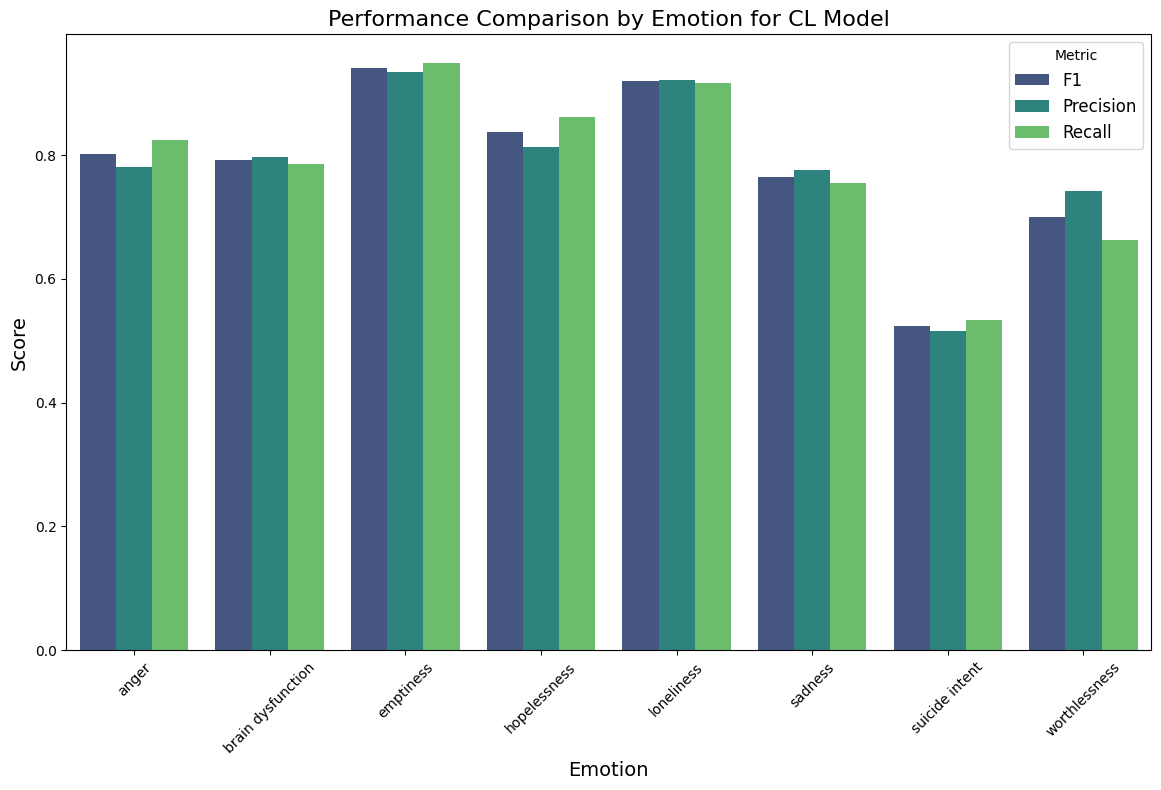

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for emotions
emotion_data = {
    'Emotion': ['anger', 'brain dysfunction', 'emptiness', 'hopelessness', 'loneliness', 'sadness', 'suicide intent', 'worthlessness'],
    'F1': [0.8017, 0.7913, 0.9407, 0.8365, 0.9190, 0.7647, 0.5241, 0.6997],
    'Precision': [0.7811, 0.7974, 0.9336, 0.8127, 0.9209, 0.7758, 0.5157, 0.7424],
    'Recall': [0.8235, 0.7853, 0.9479, 0.8619, 0.9170, 0.7540, 0.5327, 0.6623]
}

df_emotions = pd.DataFrame(emotion_data)

# Melt the dataframe to long format for seaborn
df_emotions_melted = df_emotions.melt(id_vars='Emotion', var_name='Metric', value_name='Score')

# Plot performance comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='Emotion', y='Score', hue='Metric', data=df_emotions_melted, palette='viridis')
plt.title('Performance Comparison by Emotion for CL Model', fontsize=16)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metric', fontsize=12)
plt.show()


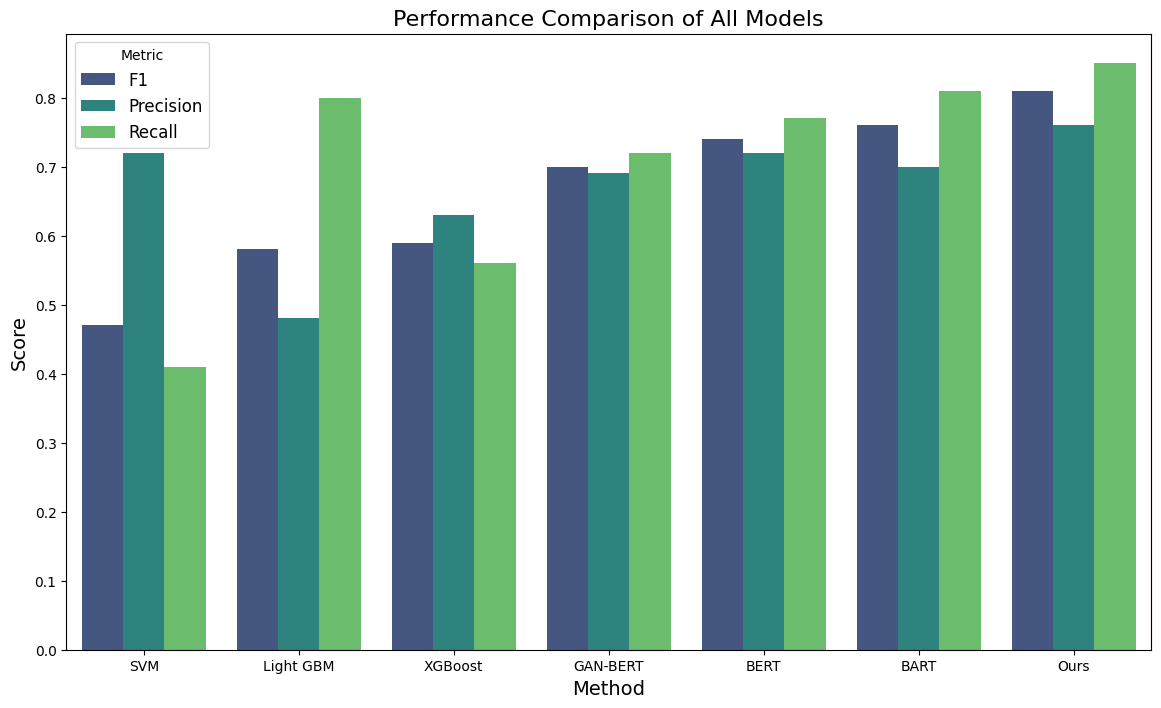

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for all models
model_data = {
    'Method': ['SVM', 'Light GBM', 'XGBoost', 'GAN-BERT', 'BERT', 'BART', 'Ours'],
    'F1': [0.47, 0.58, 0.59, 0.70, 0.74, 0.76, 0.81],
    'Precision': [0.72, 0.48, 0.63, 0.69, 0.72, 0.70, 0.76],
    'Recall': [0.41, 0.80, 0.56, 0.72, 0.77, 0.81, 0.85]
}

df_models = pd.DataFrame(model_data)

# Melt the dataframe to long format for seaborn
df_melted = df_models.melt(id_vars='Method', var_name='Metric', value_name='Score')

# Plot performance comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='Method', y='Score', hue='Metric', data=df_melted, palette='viridis')
plt.title('Performance Comparison of All Models', fontsize=16)
plt.xlabel('Method', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(title='Metric', fontsize=12)
plt.show()


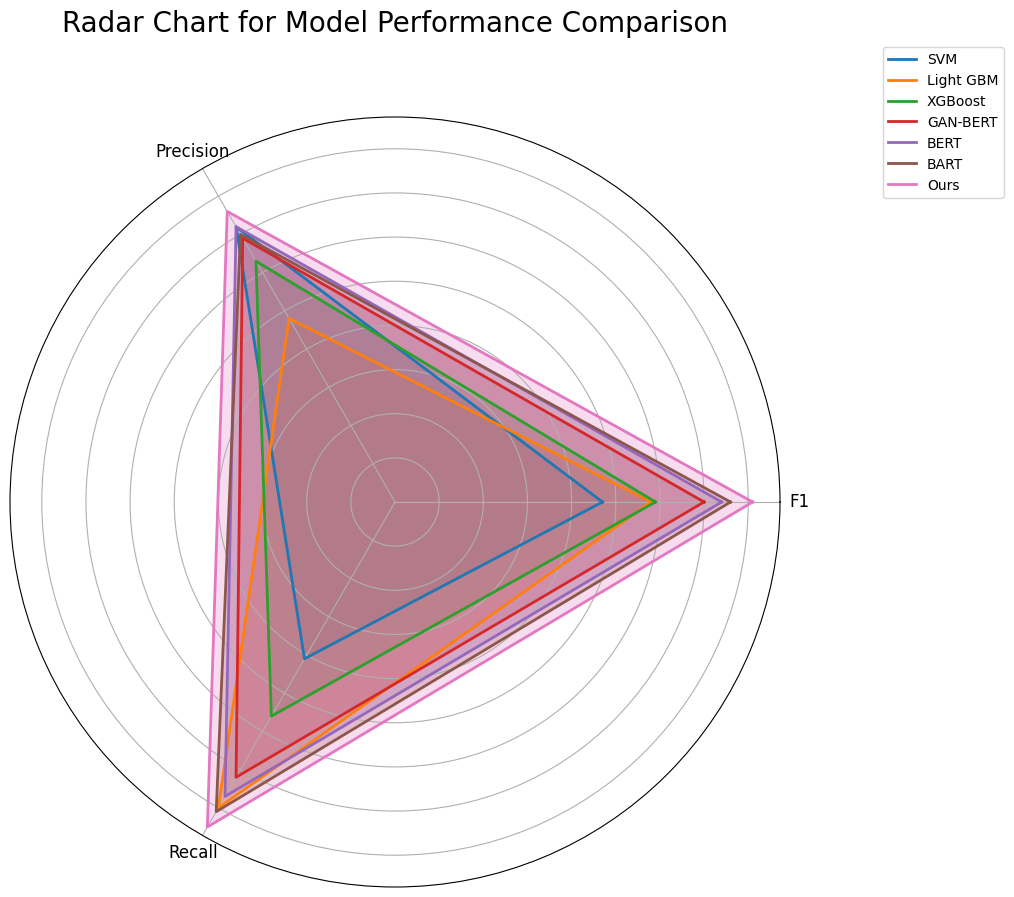

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Data for radar chart
model_data = {
    'Method': ['SVM', 'Light GBM', 'XGBoost', 'GAN-BERT', 'BERT', 'BART', 'Ours'],
    'F1': [0.47, 0.58, 0.59, 0.70, 0.74, 0.76, 0.81],
    'Precision': [0.72, 0.48, 0.63, 0.69, 0.72, 0.70, 0.76],
    'Recall': [0.41, 0.80, 0.56, 0.72, 0.77, 0.81, 0.85]
}

df_models = pd.DataFrame(model_data)

# Number of variables
categories = list(df_models.columns[1:])
N = len(categories)

# Radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for i in range(len(df_models)):
    values = df_models.loc[i].drop('Method').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, label=df_models['Method'][i], linewidth=2)
    ax.fill(angles, values, alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
plt.title('Radar Chart for Model Performance Comparison', size=20, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()
